## PyLab 2

PHY224H1S | 2020 Winter

Jeff Shen | 1004911526

Stacy Ossipov | 1004877779

31 Jan 2020

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
# defining functions

# linear model
def f(x, a, b):
    return a * x + b

# nonlinear model
def g(x, a, b):
    return b * np.exp(a * x)

# theoretical model
def theoretical(x, a, b):
    return b * np.power(0.5, x / a)

In [3]:
# reading data
_, background = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_background.txt', skiprows=2, unpack=True)
sampleid, decay = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_decay.txt', skiprows=2, unpack=True)

In [4]:
# adjusting time, subtracting background from measurements

sampleid *= 20
clean = decay - background.mean()

In [5]:
# calculating errors

stddev = np.sqrt(decay + background)
err = np.abs(stddev / clean)

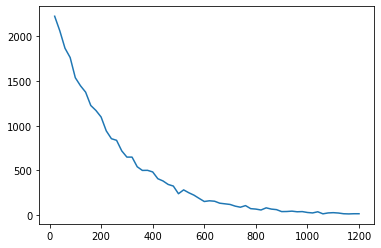

In [6]:
# initial plot, sanity check
plt.plot(sampleid, clean)

In [7]:
# fit with linear model
popt, pcov = curve_fit(f, sampleid, np.log(clean))

In [8]:
# print parameters and corresponding errors
print(popt)
print(np.sqrt(np.diag(pcov)))

[-4.39942710e-03  7.82635203e+00]
[5.15796673e-05 3.61818282e-02]


In [9]:
# print half life and corresponding error
print(f'half-life: {1/popt[0] * np.log(0.5)} seconds')
print(f'error: {np.sqrt(np.diag(pcov))[0] / np.square(popt[0])} seconds') 

half-life: 157.55396422235438 seconds
error: 2.6649329344915813 seconds


In [10]:
# fit with nonlinear model
popt2, pcov2 = curve_fit(g, sampleid, clean, p0=(-0.01, 1))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [11]:
# printing parameters and corresponding errors
print(popt2)
print(np.sqrt(np.diag(pcov2)))

[-4.27694055e-03  2.43989747e+03]
[3.16977005e-05 1.33397038e+01]


In [12]:
# print half life and corresponding error
print(f'half-life: {1/popt2[0] * np.log(0.5)} seconds')
print(f'error: {np.sqrt(np.diag(pcov2))[0] / np.square(popt2[0])} seconds')

half-life: 162.0661245227056 seconds
error: 1.7328514337306509 seconds


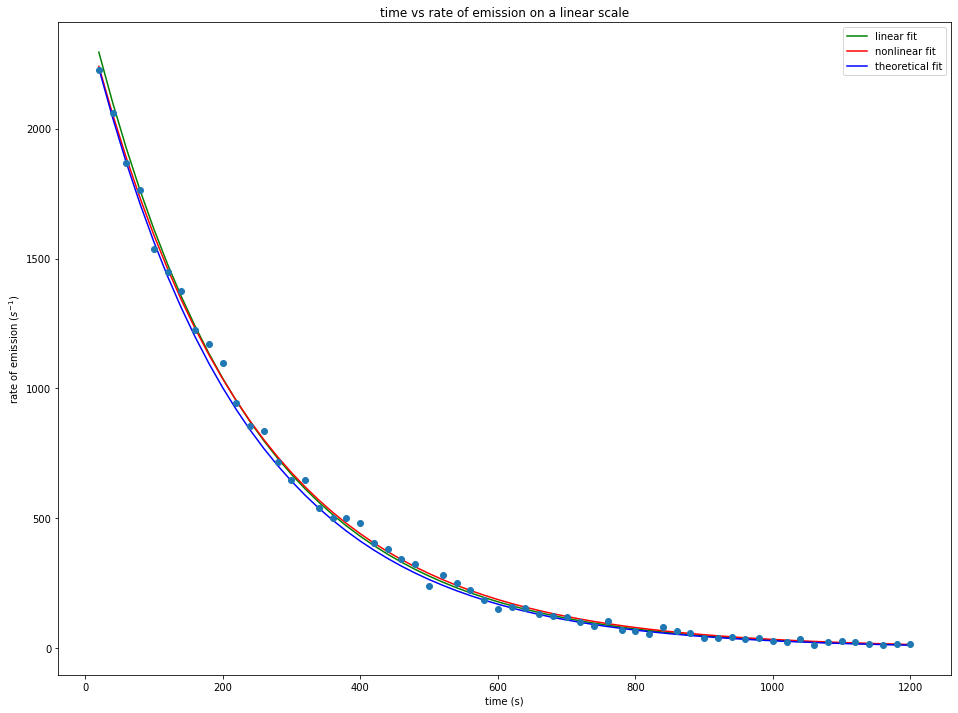

In [13]:
# plotting time vs rate on linear scale
plt.figure(figsize=(16, 12))
plt.errorbar(sampleid, clean, err, ls='', marker='o')
plt.plot(sampleid, np.exp(f(sampleid, *popt)), c='g', label='linear fit')
plt.plot(sampleid, g(sampleid, *popt2), c='r', label='nonlinear fit')
plt.plot(sampleid, g(sampleid, 1/156 * np.log(0.5), popt2[1]), c='b', label='theoretical fit')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('rate of emission ($s^{-1}$)')
plt.title('time vs rate of emission on a linear scale')
plt.savefig('pylab2-linear.png')

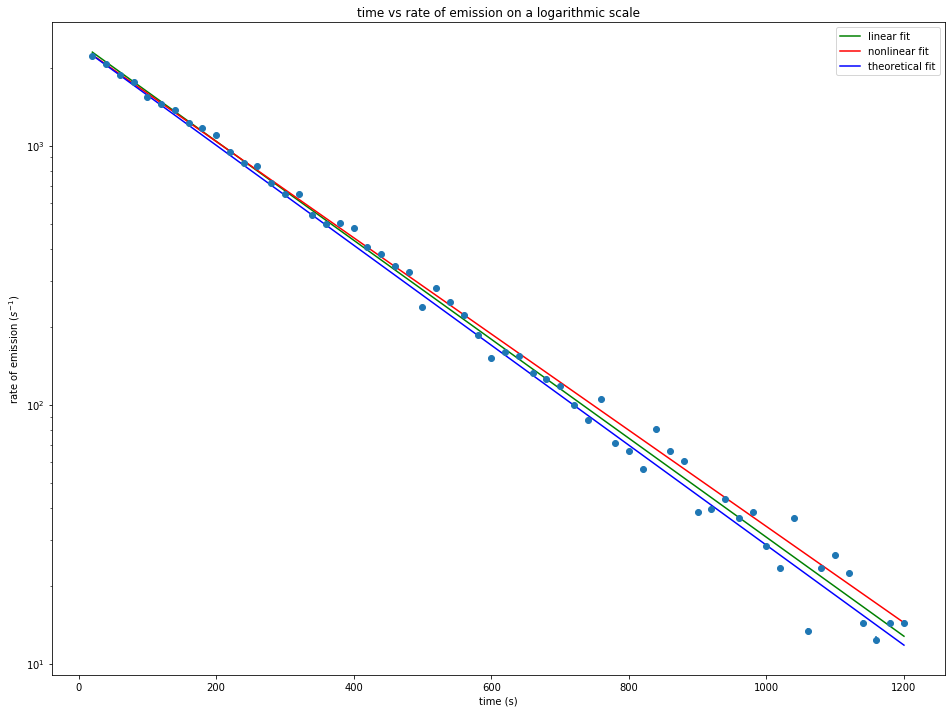

In [14]:
# same plot as above but on a log scale for the y axis
plt.figure(figsize=(16, 12))
plt.errorbar(sampleid, clean, err, ls='', marker='o')
plt.plot(sampleid, np.exp(f(sampleid, *popt)), c='g', label='linear fit')
plt.plot(sampleid, g(sampleid, *popt2), c='r', label='nonlinear fit')
plt.plot(sampleid, g(sampleid, 1/156 * np.log(0.5), popt2[1]), c='b', label='theoretical fit')
plt.yscale('log')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('rate of emission ($s^{-1}$)')
plt.title('time vs rate of emission on a logarithmic scale')
plt.savefig('pylab2-log.png')

In [15]:
# reduced chi squared function
def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [16]:
# print reduced chi squares for models
print(f'reduced chi squared for linear model: {rcs(np.exp(f(sampleid, *popt)), clean, err, 2)}')
print(f'reduced chi squared for non-linear model: {rcs(g(sampleid, *popt2), clean, err, 2)}')

reduced chi squared for linear model: 729121.9026490474
reduced chi squared for non-linear model: 354421.12337128626
